# **Importing necessary libraries for visualizations**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('data.csv.zip',compression='zip')

In [3]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [4]:
print(data.shape)
print(data.columns)

(169909, 19)
Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')


In [5]:
data.drop_duplicates(inplace=True,subset=['name'])
name=data['name']

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

col_features = ['energy', 'valence']
X = MinMaxScaler().fit_transform(data[col_features])
kmeans = KMeans(init="k-means++",
                n_clusters=4,
                random_state=15).fit(X)
data['kmeans'] = kmeans.labels_

In [7]:
data['song_name']=name
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,mode,name,popularity,release_date,speechiness,tempo,valence,year,kmeans,song_name
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,...,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,0,Singende Bataillone 1. Teil
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,...,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,3,"Fantasiestücke, Op. 111: Più tosto lento"
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,...,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,0,Chapter 1.18 - Zamek kaniowski
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,...,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,0,Bebamos Juntos - Instrumental (Remasterizado)
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,...,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,3,"Polonaise-Fantaisie in A-Flat Major, Op. 61"


In [8]:
cluster=data.groupby(by=data['kmeans'])

In [9]:
data.groupby(['kmeans']).mean()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
kmeans,,,,,,,,,,,,,,,
0,0.691614,0.595922,199905.151416,0.325753,0.069600,0.180283,5.200527,0.206713,-13.373373,0.718823,18.700694,0.146423,115.867349,0.673841,1961.133759
1,0.279368,0.630115,223083.394375,0.719059,0.091193,0.083094,5.344176,0.211479,-7.962380,0.704261,37.963551,0.081870,123.412265,0.804670,1985.500994
2,0.170815,0.510122,255162.323213,0.742954,0.183612,0.100521,5.234072,0.245998,-7.247459,0.670484,44.801080,0.099545,123.354995,0.382837,1995.986962
3,0.777504,0.405932,253498.607569,0.215227,0.034634,0.289187,5.042350,0.189379,-16.411727,0.727080,23.032720,0.077152,106.101858,0.234516,1968.426064


In [10]:
df=data
#analysing mean values of valence and energy we conclude the quadrants as
calm = df[df['kmeans']==0]
happy = df[df['kmeans']==1]
angry = df[df['kmeans']==2]
sad = df[df['kmeans']==3]

In [11]:
points = kmeans.fit_transform(data[col_features])
 
print(points)

[[0.16774647 0.52498454 0.67603778 0.54501318]
 [0.6737857  1.01358526 0.79007204 0.25572276]
 [0.23168971 0.50512316 0.72158532 0.6456722 ]
 ...
 [0.38607077 0.56962456 0.30870146 0.23913839]
 [0.40814484 0.63012265 0.37434765 0.17384663]
 [0.56280835 0.67560609 0.30616076 0.33420338]]


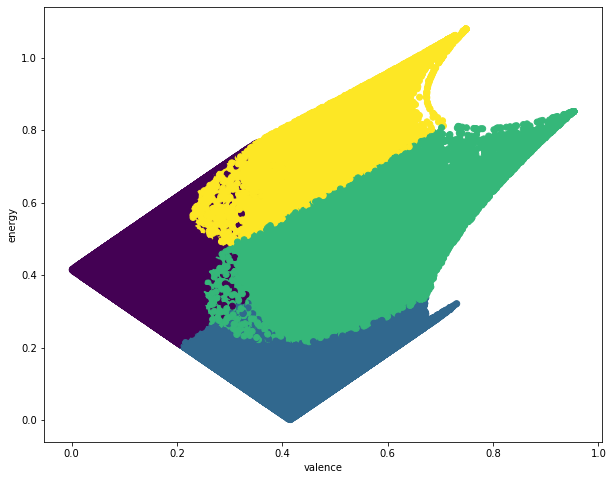

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(points[:,0], points[:,1], c=kmeans.labels_.astype(float))
plt.ylabel('energy')
plt.xlabel('valence')
plt.show()

Text(0.5, 0, 'valence')

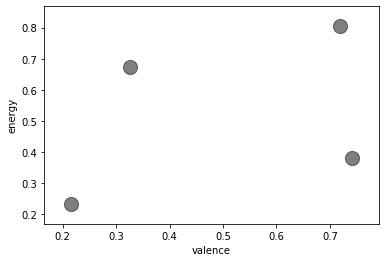

In [18]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.ylabel('energy')
plt.xlabel('valence')
#plt.legend(data['kmeans'])

In [19]:
df=data
df.loc[(df['valence'] < 0.5) & (df['energy'] <0.5), 'Mood'] = 'sad' 
df.loc[(df['valence'] > 0.5) & (df['energy'] <0.5), 'Mood'] = 'calm' 
df.loc[(df['valence'] > 0.5) & (df['energy'] >0.5), 'Mood'] = 'happy'
df.loc[(df['valence'] < 0.5) & (df['energy'] >0.5), 'Mood'] = 'anger'
#df.loc[(df['valence'] == 0.5) & (df['energy'] ==0.5), 'Mood'] = 'neutral' 
df.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,name,popularity,release_date,speechiness,tempo,valence,year,kmeans,song_name,Mood
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,...,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,0,Singende Bataillone 1. Teil,calm
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,...,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,3,"Fantasiestücke, Op. 111: Più tosto lento",sad
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,...,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,0,Chapter 1.18 - Zamek kaniowski,calm
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,...,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,0,Bebamos Juntos - Instrumental (Remasterizado),calm
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,...,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,3,"Polonaise-Fantaisie in A-Flat Major, Op. 61",sad


In [20]:
#sad quadrant
df.loc[(df['valence'] < 0.5) & (df['energy'] <0.1) & (df['energy'] >=0), 'Mood1'] = 'tired' 
df.loc[(df['valence'] < 0.5) & (df['energy'] <0.2) & (df['energy'] >=0.1), 'Mood1'] = 'bored'
df.loc[(df['valence'] < 0.5) & (df['energy'] <0.3) & (df['energy'] >=0.2), 'Mood1'] = 'sad' 
df.loc[(df['valence'] < 0.5) & (df['energy'] <0.4) & (df['energy'] >=0.3), 'Mood1'] = 'depressed'
df.loc[(df['valence'] < 0.5) & (df['energy'] <0.5) & (df['energy'] >=0.4), 'Mood1'] = 'miserable'

#calm quadrant
df.loc[(df['valence'] > 0.5) & (df['energy'] <0.5) & (df['energy'] >=0.4), 'Mood1'] = 'calm' 
df.loc[(df['valence'] > 0.5) & (df['energy'] <0.4) & (df['energy'] >=0.3), 'Mood1'] = 'content'
df.loc[(df['valence'] > 0.5) & (df['energy'] <0.3) & (df['energy'] >=0.2), 'Mood1'] = 'serene'
df.loc[(df['valence'] > 0.5) & (df['energy'] <0.2) & (df['energy'] >=0.1), 'Mood1'] = 'relaxed'
df.loc[(df['valence'] > 0.5) & (df['energy'] <0.1) & (df['energy'] >=0), 'Mood1'] = 'sleepy'

#happy quadrant
df.loc[(df['valence'] > 0.5) & (df['energy'] >=0.5) & (df['energy'] <0.6), 'Mood1'] = 'happy' 
df.loc[(df['valence'] > 0.5) & (df['energy'] >=0.6) & (df['energy'] <0.7), 'Mood1'] = 'pleased' 
df.loc[(df['valence'] > 0.5) & (df['energy'] >=0.7) & (df['energy'] <0.8), 'Mood1'] = 'delighted' 
df.loc[(df['valence'] > 0.5) & (df['energy'] >=0.8) & (df['energy'] <0.9), 'Mood1'] = 'excited' 
df.loc[(df['valence'] > 0.5) & (df['energy'] >=0.9) & (df['energy'] <1.0), 'Mood1'] = 'surprise' 

#angry quadrant
df.loc[(df['valence'] < 0.5) & (df['energy'] >=0.5) & (df['energy'] <0.6), 'Mood1'] = 'angry'
df.loc[(df['valence'] < 0.5) & (df['energy'] >=0.6) & (df['energy'] <0.7), 'Mood1'] = 'frustrated'
df.loc[(df['valence'] < 0.5) & (df['energy'] >=0.7) & (df['energy'] <0.8), 'Mood1'] = 'annoyed'
df.loc[(df['valence'] < 0.5) & (df['energy'] >=0.8) & (df['energy'] <0.9), 'Mood1'] = 'fear'
df.loc[(df['valence'] < 0.5) & (df['energy'] >=0.9) & (df['energy'] <1.0), 'Mood1'] = 'alarmed'

df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,popularity,release_date,speechiness,tempo,valence,year,kmeans,song_name,Mood,Mood1
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,...,0,1928,0.0506,118.469,0.7790,1928,0,Singende Bataillone 1. Teil,calm,relaxed
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,...,0,1928,0.0462,83.972,0.0767,1928,3,"Fantasiestücke, Op. 111: Più tosto lento",sad,tired
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,...,0,1928,0.9290,107.177,0.8800,1928,0,Chapter 1.18 - Zamek kaniowski,calm,serene
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,...,0,1928-09-25,0.0926,108.003,0.7200,1928,0,Bebamos Juntos - Instrumental (Remasterizado),calm,relaxed
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,...,1,1928,0.0424,62.149,0.0693,1928,3,"Polonaise-Fantaisie in A-Flat Major, Op. 61",sad,sad


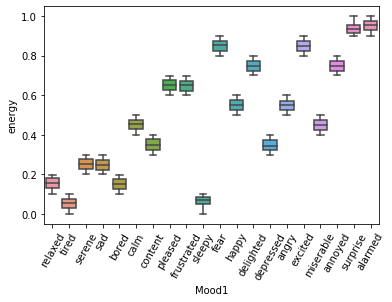

In [21]:
sns.boxplot(data=df, x='Mood1', y='energy')
plt.xticks(rotation=60)
plt.show()

## Correlation Plots

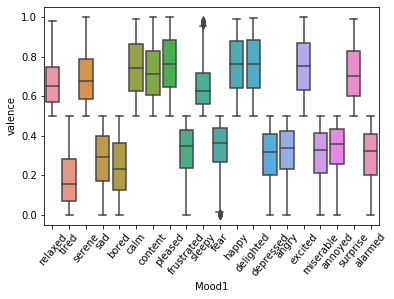

In [22]:
sns.boxplot(data=df, x='Mood1', y='valence')
plt.xticks(rotation=50)
plt.show()

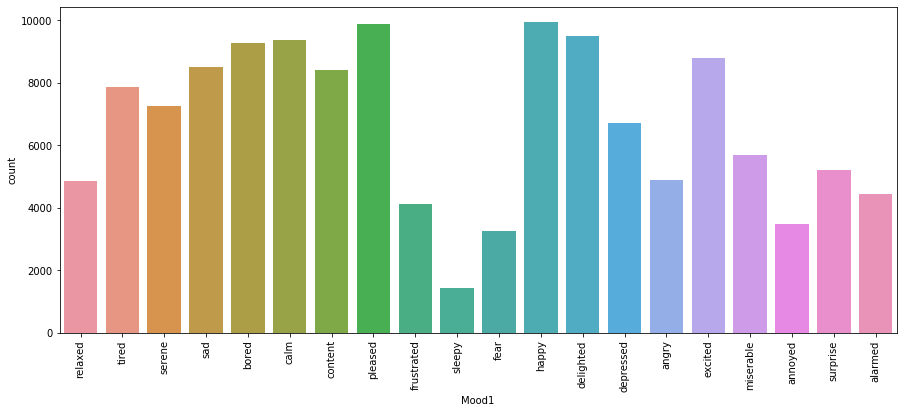

In [23]:
import numpy as np
categorical_cols = ['Mood1']

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
axs = np.ravel(axs)

for i, col in enumerate(categorical_cols):
    plt.sca(axs[i])
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)

plt.show()

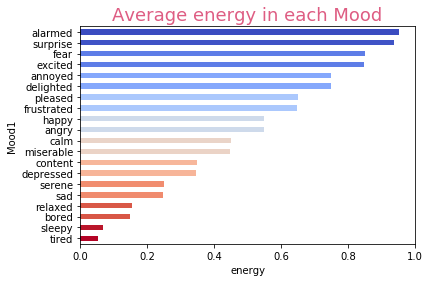

In [24]:
def plot_genre_horizontal_bar(col, title=None):
    data = df.groupby('Mood1')[col].mean().sort_values()

    cmap = plt.cm.coolwarm_r
    norm = plt.Normalize(vmin=data.min(), vmax=data.max())
    colors = [cmap(norm(value)) for value in data]

    data.plot.barh(color=colors)
    plt.xlabel(col)
    plt.title(title, fontdict={'size': 18, 'color': '#de5d83'})
    plt.show()

plot_genre_horizontal_bar('energy', title="Average energy in each Mood")

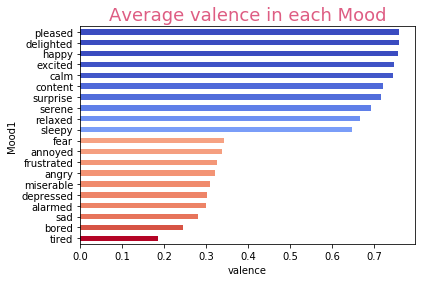

In [25]:
plot_genre_horizontal_bar('valence', title='Average valence in each Mood')

In [26]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

In [27]:
print('numerical columns are:\n{}'.format(numeric_data.columns))
print('Categorical columns are:\n{}'.format(categorical_data.columns))

numerical columns are:
Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence', 'year', 'kmeans'],
      dtype='object')
Categorical columns are:
Index(['artists', 'id', 'name', 'release_date', 'song_name', 'Mood', 'Mood1'], dtype='object')


In [28]:
numeric_data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,kmeans
count,132940.000000,132940.000000,1.329400e+05,132940.000000,132940.000000,132940.000000,132940.000000,132940.000000,132940.000000,132940.000000,132940.000000,132940.000000,132940.000000,132940.000000,132940.000000,132940.000000
mean,0.495626,0.538530,2.312716e+05,0.488797,0.090199,0.165707,5.205168,0.211753,-11.437269,0.706981,30.358763,0.101847,116.934660,0.535494,1976.727531,1.448736
std,0.378628,0.177049,1.256766e+05,0.267983,0.286467,0.311766,3.516930,0.182071,5.725657,0.455149,21.604561,0.164065,30.815993,0.262914,25.856419,1.140225
min,0.000000,0.000000,5.991000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000,0.000000
25%,0.094700,0.416000,1.700822e+05,0.263000,0.000000,0.000000,2.000000,0.099200,-14.556000,0.000000,9.000000,0.035400,93.423500,0.327000,1955.000000,0.000000
50%,0.495000,0.549000,2.077330e+05,0.481000,0.000000,0.000233,5.000000,0.138000,-10.496000,1.000000,32.000000,0.046200,114.803500,0.550000,1978.000000,1.000000
75%,0.896000,0.670000,2.630165e+05,0.711000,0.000000,0.102000,8.000000,0.271000,-7.144000,1.000000,47.000000,0.080500,135.778250,0.753000,1999.000000,3.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,97.000000,0.969000,244.091000,1.000000,2020.000000,3.000000


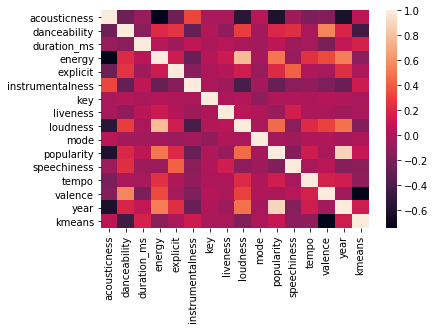

In [29]:
corrMatrix=numeric_data.corr()
sns.heatmap(corrMatrix)
plt.show()

We find that features like energy, loudness, valence, popularity and danceability are highly correlated.